# WeatherPy
----

### Analysis
* There is a signficant relationship between latitude and temparature. Temperature declines as one moves away from the equator in either direction.
* There is not a strong relationship between latitude and humidity. Interestingly, cities between 0-20S tend be less humid than cities between 0-20N.
* There is no discernible relationship between latitude and cloudiness. Cloudiness clusters at 0 and approximately 75 and 90 for all latitudes.
* There is not a strong relationship between latitude and wind speed, however, winds in excess of 20mph are concentrated in the northern hemisphere.

---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy
import openweathermapy.core as owm
from math import sin, cos, sqrt, atan2,radians,degrees,acos
import random
import csv
import datetime

In [2]:
#Haversine formula for distance between two points on a sphere. This will be used to test distance between randomly
#selected point and city location to avoid bias toward coastal cities that are nearest to some point in the middle of the ocean
def haversine(a,b):
    r=3959
    dlat=radians(a[0]-b[0])
    dlon=radians(a[1]-b[1])
    x = sin(dlat / 2)**2 + cos(radians(a[0])) * cos(radians(b[0])) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(x), sqrt(1 - x))
    dist=r * c
    return(dist)

In [3]:
#Returns the latitude and longitude of given city in the citipy module
def get_location(city):
    for loc,cit in citipy.WORLD_CITIES_DICT.items():
        if cit.city_name==city:
            return(loc)

In [4]:
#Randomly selects point on surface of sphere. Taking a random latitude from a uniform distribution will bias the sample
#toward locations near the poles, as the area of the earth between latitudes 0-1 and is much larger than 89-90.
def random_point():
    lat=degrees(acos((random.random()*2)-1))-90
    lon=np.random.uniform(low=-180.000, high=180.000)
    return(lat,lon)


In [5]:
#API lookup function
def get_weather(city):
    settings = {"units": "imperial", "appid": api_key}
    try:
        data=owm.get_current(city, **settings)
        name=data['name']
        country=data['sys']['country']
        date=datetime.datetime.fromtimestamp(data['dt']).strftime('%m-%d-%Y')
        lat=data['coord']['lat']
        lon=data['coord']['lon']
        temp=data['main']['temp_max']
        humidity=data['main']['humidity']
        wind=data['wind']['speed']
        cloud=data['clouds']['all']
        weather={'City':name,'Country':country,'Date':date,'Lat':lat,'Lon':lon,'Max Temp':temp,'Cloudiness':cloud,'Humidity':humidity,'Wind Speed':wind}
        return(weather)
    except:
        return(None)

In [6]:
#Main data retrieval loop
print('Beginning Data Retrieval')
print('------------------------')
cities=[]
while len(cities)<500:
    lat,lon=random_point()
    nearest=citipy.nearest_city(lat,lon)
    city=nearest.city_name
    if city not in cities:
        city_coord=get_location(city)
        dist=haversine((lat,lon),city_coord)
        if dist<100:
            weather=get_weather(city)
            if weather!=None:
                cities.append(weather)
                print('Processing Record %3d of 500 | %s' % (len(cities),city))
            else:
                print('City not found. Skipping...')
                
                
                
        


Beginning Data Retrieval
------------------------
Processing Record   1 of 500 | onega
Processing Record   2 of 500 | findlay
Processing Record   3 of 500 | santa isabel do rio negro
Processing Record   4 of 500 | tamale
Processing Record   5 of 500 | poso
Processing Record   6 of 500 | varzea da palma
Processing Record   7 of 500 | longyan
Processing Record   8 of 500 | aklavik
Processing Record   9 of 500 | pak phanang
City not found. Skipping...
Processing Record  10 of 500 | port alfred
Processing Record  11 of 500 | alta floresta
Processing Record  12 of 500 | amahai
Processing Record  13 of 500 | tiksi
Processing Record  14 of 500 | ambatofinandrahana
Processing Record  15 of 500 | andros town
Processing Record  16 of 500 | orumiyeh
Processing Record  17 of 500 | noyabrsk
Processing Record  18 of 500 | otjiwarongo
Processing Record  19 of 500 | mandalgovi
Processing Record  20 of 500 | potosi
Processing Record  21 of 500 | dicabisagan
Processing Record  22 of 500 | terrace
Proces

Processing Record 181 of 500 | badarpur
Processing Record 182 of 500 | izberbash
Processing Record 183 of 500 | wodonga
Processing Record 184 of 500 | mokshan
Processing Record 185 of 500 | ikwiriri
Processing Record 186 of 500 | iskateley
Processing Record 187 of 500 | kirakira
Processing Record 188 of 500 | rodrigues alves
Processing Record 189 of 500 | san benito
Processing Record 190 of 500 | lower hutt
Processing Record 191 of 500 | kunnamkulam
Processing Record 192 of 500 | cap-aux-meules
City not found. Skipping...
Processing Record 193 of 500 | nizhniy baskunchak
Processing Record 194 of 500 | puerto leguizamo
Processing Record 195 of 500 | tikrit
Processing Record 196 of 500 | shentala
Processing Record 197 of 500 | asosa
Processing Record 198 of 500 | boyuibe
Processing Record 199 of 500 | seguin
Processing Record 200 of 500 | kohima
Processing Record 201 of 500 | demba
Processing Record 202 of 500 | fillmore
City not found. Skipping...
Processing Record 203 of 500 | bourail


Processing Record 372 of 500 | gao
Processing Record 373 of 500 | luquillo
Processing Record 374 of 500 | upernavik
Processing Record 375 of 500 | madingou
Processing Record 376 of 500 | jahangirpur
Processing Record 377 of 500 | ondjiva
Processing Record 378 of 500 | songling
Processing Record 379 of 500 | upernavik
Processing Record 380 of 500 | roshni-chu
Processing Record 381 of 500 | ouesso
Processing Record 382 of 500 | itanhandu
Processing Record 383 of 500 | deputatskiy
Processing Record 384 of 500 | berestechko
Processing Record 385 of 500 | sisimiut
Processing Record 386 of 500 | ikom
Processing Record 387 of 500 | simpang
Processing Record 388 of 500 | great bend
Processing Record 389 of 500 | nanakuli
Processing Record 390 of 500 | tallahassee
City not found. Skipping...
Processing Record 391 of 500 | bon air
Processing Record 392 of 500 | olgina
Processing Record 393 of 500 | linjiang
Processing Record 394 of 500 | lerwick
Processing Record 395 of 500 | leningradskiy
City 

In [7]:
#Create DataFrame and output to csv
df=pd.DataFrame(cities,columns=['City','Country','Date','Lat','Lon','Max Temp','Humidity','Cloudiness','Wind Speed'])
df.to_csv('cities.csv',index=False)
df.head()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Onega,RU,09-02-2018,63.91,38.09,61.79,91,12,1.97
1,Findlay,US,09-02-2018,41.04,-83.65,77.00,81,1,9.17
2,Santa Isabel do Rio Negro,BR,09-02-2018,-0.41,-65.02,83.39,82,48,5.10
3,Tamale,GH,09-02-2018,9.40,-0.84,82.85,88,76,6.55
4,Poso,ID,09-02-2018,-1.40,120.75,74.75,100,12,4.09


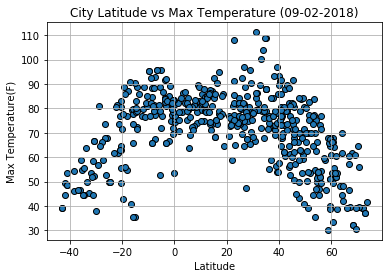

In [12]:
#Temperature Graph
plt.scatter(df['Lat'],df['Max Temp'],edgecolors='black')
plt.title("City Latitude vs Max Temperature (%s)" % datetime.datetime.today().strftime('%m-%d-%Y'))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.savefig("temperature.png")
plt.show()
plt.close()

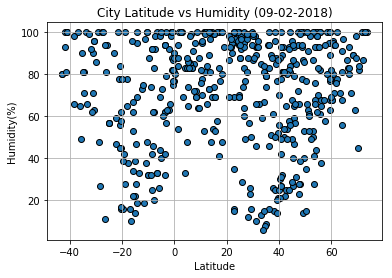

In [14]:
#Humidity Graph
plt.scatter(df['Lat'],df['Humidity'],edgecolors='black')
plt.title("City Latitude vs Humidity (%s)" % datetime.datetime.today().strftime('%m-%d-%Y'))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("humidity.png")
plt.show()
plt.close()

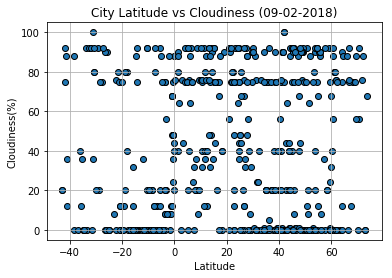

In [15]:
#Cloudiness Graph
plt.scatter(df['Lat'],df['Cloudiness'],edgecolors='black')
plt.title("City Latitude vs Cloudiness (%s)" % datetime.datetime.today().strftime('%m-%d-%Y'))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("cloudiness.png")
plt.show()
plt.close()

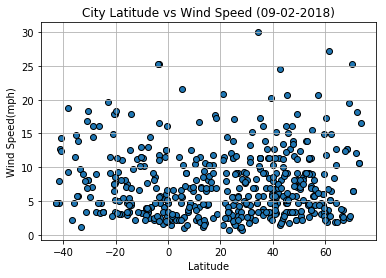

In [16]:
#Wind-Speed Graph
plt.scatter(df['Lat'],df['Wind Speed'],edgecolors='black')
plt.title("City Latitude vs Wind Speed (%s)" % datetime.datetime.today().strftime('%m-%d-%Y'))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()
plt.savefig("windspeed.png")
plt.show()
plt.close()